<a href="https://colab.research.google.com/github/JessicaWoods03/Comp411Assignments/blob/main/Homework10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Explain how does the k-means algorithm work?

A simple optimization problem, an iterative approach for minimizing the within-cluster Sum of Squared
Errors (SSE), which is sometimes also called cluster inertia. That works in four simple steps according to our notes:

1. Randomly pick k centroids from the sample points as initial cluster centers.
2. Assign each sample to the nearest centroid μ(j), j∈{1,...,k}.
3. Move the centroids to the center of the samples that were assigned to it.
4. Repeat steps 2 and 3 until the cluster assignments do not change or a user-deNned
tolerance or maximum number of iterations is reached.


2. Based on the given data set (week10_data.csv) apply k-mean clustering , identitify the number of clusters using the elbow method, present the results by scatter plot.

So i found a way to upload files to Co-labs:
via this website-

http://www.dataperspective.info/2019/02/how-to-import-data-into-google-colab.html

Code below was from that website-

In [1]:
from google.colab import files
uploaded = files.upload()

Saving week10_data.csv to week10_data.csv


In [2]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

User uploaded file "week10_data.csv" with length 2144 bytes


This part is my code- 

playing with the models we were given-

In [5]:
import pandas as pd
import numpy as np
import io
df = pd.read_csv(io.StringIO(uploaded['week10_data.csv'].decode('utf-8')))
df.head

<bound method NDFrame.head of      CustomerID  Annual Income (k$)  Spending Score (1-100)
0             1                  15                      39
1             2                  15                      81
2             3                  16                       6
3             4                  16                      77
4             5                  17                      40
..          ...                 ...                     ...
195         196                 120                      79
196         197                 126                      28
197         198                 126                      74
198         199                 137                      18
199         200                 137                      83

[200 rows x 3 columns]>

In [44]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples = 200,
                 n_features = 2,
                 centers= 3,
                 cluster_std= 0.5,
                 shuffle= True,
                 random_state = 0)
X[:5]


array([[-1.63035585,  3.35797172],
       [ 0.802314  ,  4.38196181],
       [ 1.05374379,  4.49286859],
       [-1.47804153,  3.2093591 ],
       [ 1.12538917,  4.96698028]])

In [45]:
y

array([2, 0, 0, 2, 0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1,
       0, 0, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 1, 1, 2,
       1, 1, 2, 1, 1, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 0, 2,
       0, 1, 2, 2, 1, 0, 1, 0, 0, 2, 2, 1, 1, 0, 2, 0, 2, 0, 1, 0, 0, 1,
       0, 2, 1, 2, 0, 0, 0, 1, 2, 2, 1, 1, 2, 0, 1, 0, 2, 1, 2, 0, 2, 1,
       1, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 1, 2, 2, 2,
       0, 1, 1, 1, 0, 0, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 1, 0, 1, 2, 2,
       0, 2, 0, 1, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 2, 2, 1, 1, 1, 1, 2, 1,
       0, 1])

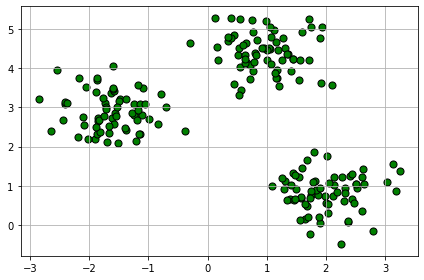

In [46]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], 
            c = 'green', marker='o', edgecolor ='black', s=50)
plt.grid()
plt.tight_layout()
plt.show()

no. *2* below-

I like this one better, because I can see the centriods on the plot graph- versus the other one I can't really see the centriods, I can only see the blobs-

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3,
            init = 'random',
            n_init = 10,
            max_iter = 300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)
plt.scatter(X[y_km == 0, 0],
 X[y_km == 0, 1],
 s=50, c='pink',
 marker='s', edgecolor='black',
 label='cluster 1')
plt.scatter(X[y_km == 1, 0],
 X[y_km == 1, 1],
 s=50, c='white',
 marker='o', edgecolor='black',
 label='cluster 2')
plt.scatter(X[y_km == 2, 0],
 X[y_km == 2, 1],
 s=50, c='yellow',
 marker='v', edgecolor='black',
 label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
 km.cluster_centers_[:, 1],
 s=250, marker='*',
 c='red', edgecolor='black',
 label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()


this part doesn't want to work for some reason??

Distortion: 94.00


ValueError: ignored

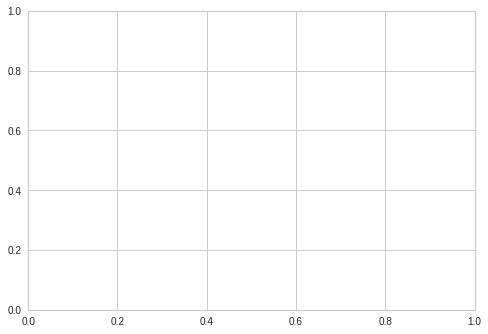

In [53]:
print('Distortion: %.2f' % km.inertia_) 
distortions = []
for i in range(1, 11):
 km = KMeans(n_clusters=i,
 init='k-means++',
 n_init=10,
 max_iter=300,
 random_state=0)
 km.fit(X)
distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

3. Apply silhouette analysis on the above k-mean clustering.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


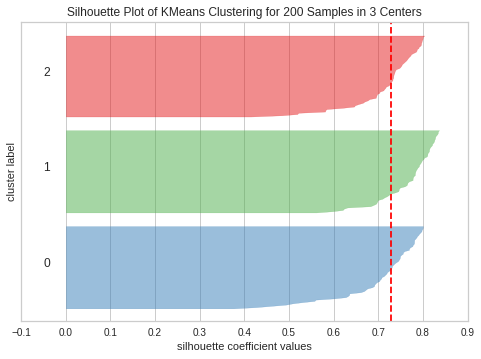

In [51]:

from yellowbrick.cluster import SilhouetteVisualizer
# Instantiate the clustering model and visualizer
model = KMeans(n_clusters=3,
 init='k-means++',
 n_init=10,
 max_iter=300,
 tol=1e-04,
 random_state=0)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(X) # Fit the data to the visualizer
visualizer.poof() # Draw the data

Making moons for fun-


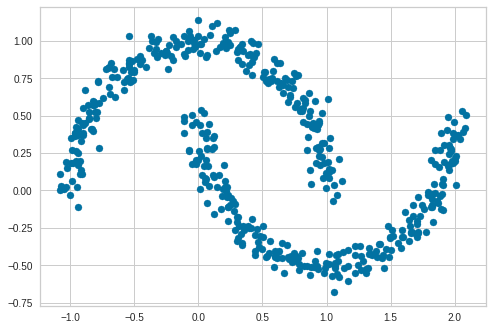

In [60]:
from sklearn.datasets import make_moons

X1, y1 = make_moons (n_samples=500, noise= 0.06, random_state=0)
plt.scatter(X1[:, 0], X1[:, 1])
plt.tight_layout
plt.show()